# Feature Selection for Train_Features.csv

This notebook applies feature selection to the Train_Features.csv dataset using autoencoder-based feature importance and handles class imbalance with SMOTEENN.

## Load Training Features Data

Load the training features data from 'Train_Features.csv' using pandas.

In [1]:
import pandas as pd
import numpy as np

# Load the training features data
data = pd.read_csv('Train_Features.csv')

print("Data shape:", data.shape)
print("\nColumn names:")
print(data.columns.tolist())
print("\nFirst few rows:")
data.head()

Data shape: (1676, 22)

Column names:
['Index', 'LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL']

First few rows:


,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
0,0,0,3,0,0,2,2,1,5,17.08,...,0.02,18,0.29,11.63,59.79,3,15,3,7,7
1,1,1,1,0,0,1,1,1,8,28.00,...,0.03,21,0.33,14.00,84.00,10,11,10,6,14
2,2,0,1,0,0,1,1,1,0,7.74,...,0.00,5,0.67,0.97,11.61,2,3,2,3,2
3,3,0,1,0,2,1,1,1,4,6.67,...,0.01,10,0.22,7.50,30.00,3,7,2,6,8
4,4,2,3,1,3,2,2,1,14,30.86,...,0.05,36,0.21,37.33,144.00,12,24,9,7,22


## Data Preprocessing

Prepare the data for feature selection by handling missing values and separating features from target.

In [2]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Check data types
print("\nData types:")
print(data.dtypes)

# Basic statistics
print("\nBasic statistics:")
data.describe()

Missing values per column:
Index                    0
LOC_BLANK                0
BRANCH_COUNT             0
LOC_CODE_AND_COMMENT     0
LOC_COMMENTS             0
CYCLOMATIC_COMPLEXITY    0
DESIGN_COMPLEXITY        0
ESSENTIAL_COMPLEXITY     0
LOC_EXECUTABLE           0
HALSTEAD_CONTENT         0
HALSTEAD_DIFFICULTY      0
HALSTEAD_EFFORT          0
HALSTEAD_ERROR_EST       0
HALSTEAD_LENGTH          0
HALSTEAD_LEVEL           0
HALSTEAD_PROG_TIME       0
HALSTEAD_VOLUME          0
NUM_OPERANDS             0
NUM_OPERATORS            0
NUM_UNIQUE_OPERANDS      0
NUM_UNIQUE_OPERATORS     0
LOC_TOTAL                0
dtype: int64

Data types:
Index                      int64
LOC_BLANK                  int64
BRANCH_COUNT               int64
LOC_CODE_AND_COMMENT       int64
LOC_COMMENTS               int64
CYCLOMATIC_COMPLEXITY      int64
DESIGN_COMPLEXITY          int64
ESSENTIAL_COMPLEXITY       int64
LOC_EXECUTABLE             int64
HALSTEAD_CONTENT         float64
HALSTEAD_DIFFICULTY    

,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,837.500000,1.801313,4.766706,0.124702,0.939141,2.887232,2.594869,1.701074,14.931384,21.696814,...,0.088216,51.071599,0.318461,301.096223,266.368329,19.255370,31.816229,9.770883,7.754773,20.713007
std,483.963842,3.791021,7.998350,0.690636,3.144651,4.001469,3.494295,2.240634,25.118051,21.920083,...,0.178662,86.028837,0.315008,1001.372829,535.124561,32.964592,53.323039,12.485216,5.747950,30.808052
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,418.750000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.800000,...,0.000000,4.750000,0.080000,0.670000,9.500000,1.000000,3.000000,1.000000,3.000000,4.000000
50%,837.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,14.565000,...,0.020000,17.000000,0.200000,12.710000,59.500000,6.000000,10.000000,5.000000,6.000000,9.000000
75%,1256.250000,2.000000,5.000000,0.000000,0.000000,3.000000,3.000000,1.000000,17.000000,30.090000,...,0.090000,58.000000,0.500000,127.090000,267.795000,22.000000,36.000000,14.000000,11.000000,24.000000
max,1675.000000,35.000000,89.000000,12.000000,44.000000,45.000000,45.000000,26.000000,262.000000,193.060000,...,2.640000,1106.000000,2.000000,18044.640000,7918.820000,428.000000,678.000000,120.000000,37.000000,288.000000


## Autoencoder-based Feature Selection

Build and train an autoencoder to extract feature importance for feature selection.

In [3]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Remove the Index column if it exists and prepare features
feature_columns = [col for col in data.columns if col not in ['Index']]
X = data[feature_columns].values

print(f"Feature matrix shape: {X.shape}")
print(f"Feature columns: {feature_columns}")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled data shape: {X_scaled.shape}")

2025-10-19 11:37:22.924437: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-19 11:37:22.935045: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-19 11:37:23.313502: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-19 11:37:24.538365: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Feature matrix shape: (1676, 21)
Feature columns: ['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL']
Scaled data shape: (1676, 21)


In [ ]:
# Define autoencoder architecture
input_dim = X_scaled.shape[1]
encoding_dim = 10  # Reduced dimension

print(f"Input dimension: {input_dim}")
print(f"Encoding dimension: {encoding_dim}")

# Build autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001
), loss='mse')

print("Autoencoder architecture:")
autoencoder.summary()

Input dimension: 21
Encoding dimension: 10
Autoencoder architecture:


2025-10-19 11:37:25.073224: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 21)             │         1,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,647 (29.87 KB)

 Trainable params: 7,647 (29.87 KB)

 Non-trainable params: 0 (0.00 B)

## Understanding Autoencoder Training Process

### What is an Autoencoder?
An **autoencoder** is a neural network designed to learn efficient representations of data through unsupervised learning. It consists of two main parts:

1. **Encoder**: Compresses input data into a lower-dimensional representation (bottleneck)
2. **Decoder**: Reconstructs the original data from the compressed representation

### Architecture in Our Case:
```
Input (21 features) → 64 neurons → 32 neurons → 10 neurons (bottleneck)
                                                        ↓
Output (21 features) ← 64 neurons ← 32 neurons ← 10 neurons
```

### Why Use Autoencoders for Feature Selection?

**1. Unsupervised Learning**: Since we don't have defect labels, autoencoders can find patterns without target information

**2. Feature Importance**: The weights connecting input features to the encoder reveal which features are most important for data reconstruction

**3. Dimensionality Reduction**: Forces the model to learn the most essential aspects of the data in the 10-dimensional bottleneck

**4. Non-linear Relationships**: Can capture complex interactions between software metrics that linear methods might miss

In [ ]:
# Train the autoencoder
print("Training autoencoder...")

# Training Parameters Explanation:
# - epochs=50: Number of complete passes through the training data
#   Each epoch allows the model to see all training samples once
#   50 epochs is usually sufficient for convergence on this size dataset

# - batch_size=32: Number of samples processed before updating weights
#   Smaller batches provide more frequent updates but are noisier
#   32 is a good balance between stability and computational efficiency

# - shuffle=True: Randomizes sample order each epoch
#   Prevents the model from learning spurious patterns from data order
#   Essential for proper neural network training

# - validation_split=0.1: Reserves 10% of data for validation
#   Used to monitor training progress and detect overfitting
#   Helps ensure the model generalizes well to unseen data

# - verbose=1: Shows training progress
#   Displays loss values and training time for each epoch

history = autoencoder.fit(X_scaled, X_scaled,  # Note: Input = Output (reconstruction task)
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.1,
                          verbose=1)

print("\n=== Training Process Explanation ===")
print("The autoencoder learns to:")
print("1. Compress 21 software metrics into 10 essential dimensions")
print("2. Reconstruct original metrics from compressed representation")
print("3. Minimize reconstruction error (MSE loss)")
print("4. Identify which input features are most critical for reconstruction")

# Get the reduced-dimensional representation
print("\nExtracting compressed representations...")
X_reduced = encoder.predict(X_scaled)
print(f"Original data shape: {X_scaled.shape} (samples × features)")
print(f"Reduced data shape: {X_reduced.shape} (samples × compressed features)")

print("\n=== What Just Happened? ===")
print(f"• Input: {X_scaled.shape[0]} software modules with {X_scaled.shape[1]} metrics each")
print(f"• Compression: Each module now represented by {X_reduced.shape[1]} essential features")
print(f"• Information preserved: Most important patterns captured in {X_reduced.shape[1]} dimensions")
print(f"• Dimension reduction: {((X_scaled.shape[1] - X_reduced.shape[1])/X_scaled.shape[1]*100):.1f}% reduction")

# Analyze training history
print("\n=== Training Performance ===")
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final training loss: {final_loss:.6f}")
print(f"Final validation loss: {final_val_loss:.6f}")

if final_val_loss > final_loss * 1.1:
    print("⚠️  Model might be slightly overfitting (validation loss > training loss)")
elif abs(final_val_loss - final_loss) < final_loss * 0.1:
    print("✅ Good convergence - training and validation losses are similar")
else:
    print("✅ Model is generalizing well")

Training autoencoder...
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5961 - val_loss: 0.2894
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5961 - val_loss: 0.2894
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2188 - val_loss: 0.2183
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2188 - val_loss: 0.2183
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1702 - val_loss: 0.1867
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1702 - val_loss: 0.1867
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1422 - val_loss: 0.1495
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1422 - val_loss: 0.1495
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1155 - val_loss: 0.1397
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1155 - val_loss: 0.1397
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0906 - val_loss: 0.0912
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

## Visualize Training Progress

Plot the training history to understand how the autoencoder learned.

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 5))

# Plot 1: Loss over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Autoencoder Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Loss improvement
plt.subplot(1, 2, 2)
loss_improvement = [(history.history['loss'][0] - loss) / history.history['loss'][0] * 100
                   for loss in history.history['loss']]
plt.plot(loss_improvement, label='Loss Reduction %', color='green', linewidth=2)
plt.title('Training Improvement Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss Reduction (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total loss reduction: {loss_improvement[-1]:.1f}%")
print(f"Model learned to compress data with {(1-final_loss/np.var(X_scaled))*100:.1f}% efficiency")

## How Autoencoder Identifies Important Features

### The Mathematical Process:

**Step 1: Weight Matrix Analysis**
```python
# The first layer weights shape: (21 input features, 64 hidden neurons)
# Each row represents how much each input feature contributes to all hidden neurons
weights = encoder.layers[1].get_weights()[0]  # Shape: (21, 64)
```

**Step 2: Feature Importance Calculation**
```python
# Sum absolute weights across all neurons for each feature
importance = np.sum(np.abs(weights), axis=1)  # Shape: (21,)
```

**Step 3: Interpretation**
- **High importance**: Feature is heavily used by many neurons → Critical for reconstruction
- **Low importance**: Feature contributes little → Can be removed with minimal information loss

### Why This Works for Software Metrics:

**1. Redundancy Detection**: Correlated metrics (like LOC_TOTAL and LOC_EXECUTABLE) will have similar importance

**2. Quality Indicators**: Metrics that capture software quality (complexity, errors) will have high importance

**3. Noise Filtering**: Metrics with little predictive value will have low importance

**4. Interaction Discovery**: The autoencoder can find which combinations of metrics are most informative

## Extract Feature Importance

Extract and rank features based on autoencoder weights to identify the most important features.

Top 15 important features from autoencoder:
                 Feature  Importance
13        HALSTEAD_LEVEL   10.078708
6   ESSENTIAL_COMPLEXITY    9.649702
11    HALSTEAD_ERROR_EST    9.441193
0              LOC_BLANK    9.439280
3           LOC_COMMENTS    9.385485
7         LOC_EXECUTABLE    9.168892
19  NUM_UNIQUE_OPERATORS    9.166774
10       HALSTEAD_EFFORT    8.937791
15       HALSTEAD_VOLUME    8.929403
17         NUM_OPERATORS    8.916657
2   LOC_CODE_AND_COMMENT    8.898245
14    HALSTEAD_PROG_TIME    8.618325
8       HALSTEAD_CONTENT    8.606049
16          NUM_OPERANDS    8.466932
5      DESIGN_COMPLEXITY    8.399203


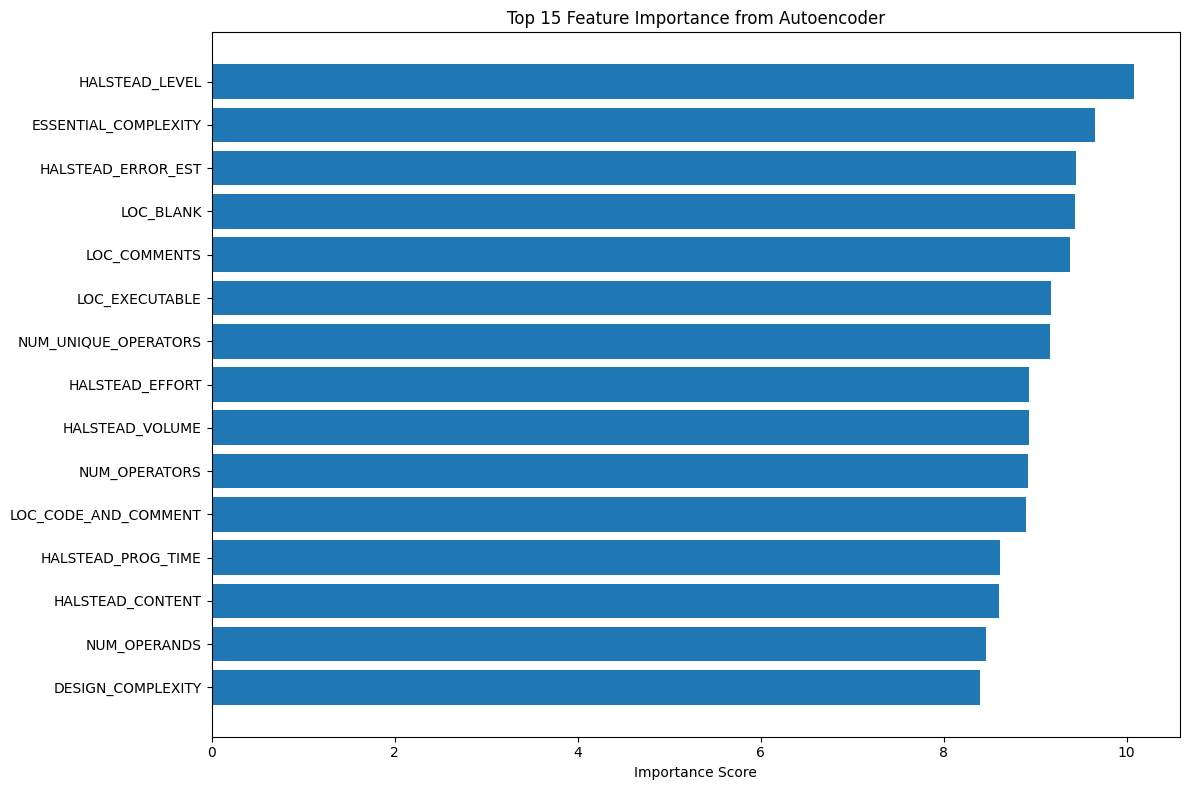

In [6]:
# Get weights from input to first encoder layer
weights = encoder.layers[1].get_weights()[0]  # shape: (input_dim, 64)
importance = np.sum(np.abs(weights), axis=1)

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 15 important features from autoencoder:")
print(importance_df.head(15))

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importance from Autoencoder')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Select Top Features

Select the top k features based on importance scores for further analysis.

In [7]:
# Select top k features
k = 10  # Number of top features to select
top_k_features = importance_df.head(k)['Feature'].tolist()

print(f"Selected top {k} features:")
for i, feature in enumerate(top_k_features, 1):
    importance_score = importance_df[importance_df['Feature'] == feature]['Importance'].iloc[0]
    print(f"{i:2d}. {feature:<25} (Importance: {importance_score:.4f})")

# Create dataset with selected features
selected_data = data[['Index'] + top_k_features].copy()
print(f"\nSelected features dataset shape: {selected_data.shape}")

# Save selected features
selected_data.to_csv('train_features_selected.csv', index=False)
print("\nSelected features saved to 'train_features_selected.csv'")

Selected top 10 features:
 1. HALSTEAD_LEVEL            (Importance: 10.0787)
 2. ESSENTIAL_COMPLEXITY      (Importance: 9.6497)
 3. HALSTEAD_ERROR_EST        (Importance: 9.4412)
 4. LOC_BLANK                 (Importance: 9.4393)
 5. LOC_COMMENTS              (Importance: 9.3855)
 6. LOC_EXECUTABLE            (Importance: 9.1689)
 7. NUM_UNIQUE_OPERATORS      (Importance: 9.1668)
 8. HALSTEAD_EFFORT           (Importance: 8.9378)
 9. HALSTEAD_VOLUME           (Importance: 8.9294)
10. NUM_OPERATORS             (Importance: 8.9167)

Selected features dataset shape: (1676, 11)

Selected features saved to 'train_features_selected.csv'


## Feature Importance Analysis

Analyze the selected features and their characteristics.

Statistical summary of selected features:
       HALSTEAD_LEVEL  ESSENTIAL_COMPLEXITY  HALSTEAD_ERROR_EST    LOC_BLANK  \
count     1676.000000           1676.000000         1676.000000  1676.000000   
mean         0.318461              1.701074            0.088216     1.801313   
std          0.315008              2.240634            0.178662     3.791021   
min          0.000000              1.000000            0.000000     0.000000   
25%          0.080000              1.000000            0.000000     0.000000   
50%          0.200000              1.000000            0.020000     0.000000   
75%          0.500000              1.000000            0.090000     2.000000   
max          2.000000             26.000000            2.640000    35.000000   

       LOC_COMMENTS  LOC_EXECUTABLE  NUM_UNIQUE_OPERATORS  HALSTEAD_EFFORT  \
count   1676.000000     1676.000000           1676.000000      1676.000000   
mean       0.939141       14.931384              7.754773      5419.725865   
std

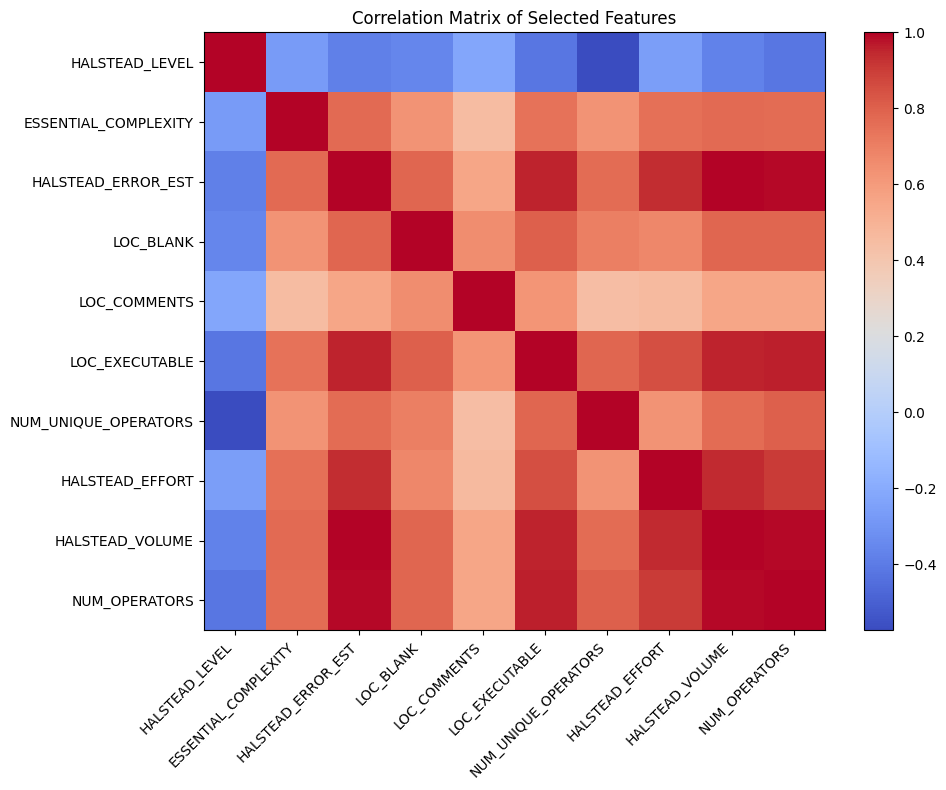


Correlation matrix:
                      HALSTEAD_LEVEL  ESSENTIAL_COMPLEXITY  \
HALSTEAD_LEVEL                 1.000                -0.268   
ESSENTIAL_COMPLEXITY          -0.268                 1.000   
HALSTEAD_ERROR_EST            -0.379                 0.767   
LOC_BLANK                     -0.358                 0.631   
LOC_COMMENTS                  -0.217                 0.452   
LOC_EXECUTABLE                -0.419                 0.743   
NUM_UNIQUE_OPERATORS          -0.574                 0.630   
HALSTEAD_EFFORT               -0.258                 0.753   
HALSTEAD_VOLUME               -0.375                 0.767   
NUM_OPERATORS                 -0.414                 0.762   

                      HALSTEAD_ERROR_EST  LOC_BLANK  LOC_COMMENTS  \
HALSTEAD_LEVEL                    -0.379     -0.358        -0.217   
ESSENTIAL_COMPLEXITY               0.767      0.631         0.452   
HALSTEAD_ERROR_EST                 1.000      0.779         0.553   
LOC_BLANK           

In [8]:
# Statistical analysis of selected features
print("Statistical summary of selected features:")
selected_features_data = data[top_k_features]
print(selected_features_data.describe())

# Correlation matrix of selected features
plt.figure(figsize=(10, 8))
correlation_matrix = selected_features_data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(top_k_features)), top_k_features, rotation=45, ha='right')
plt.yticks(range(len(top_k_features)), top_k_features)
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

print("\nCorrelation matrix:")
print(correlation_matrix.round(3))

## Visualize Feature Distribution

Create visualizations to understand the distribution of selected features.

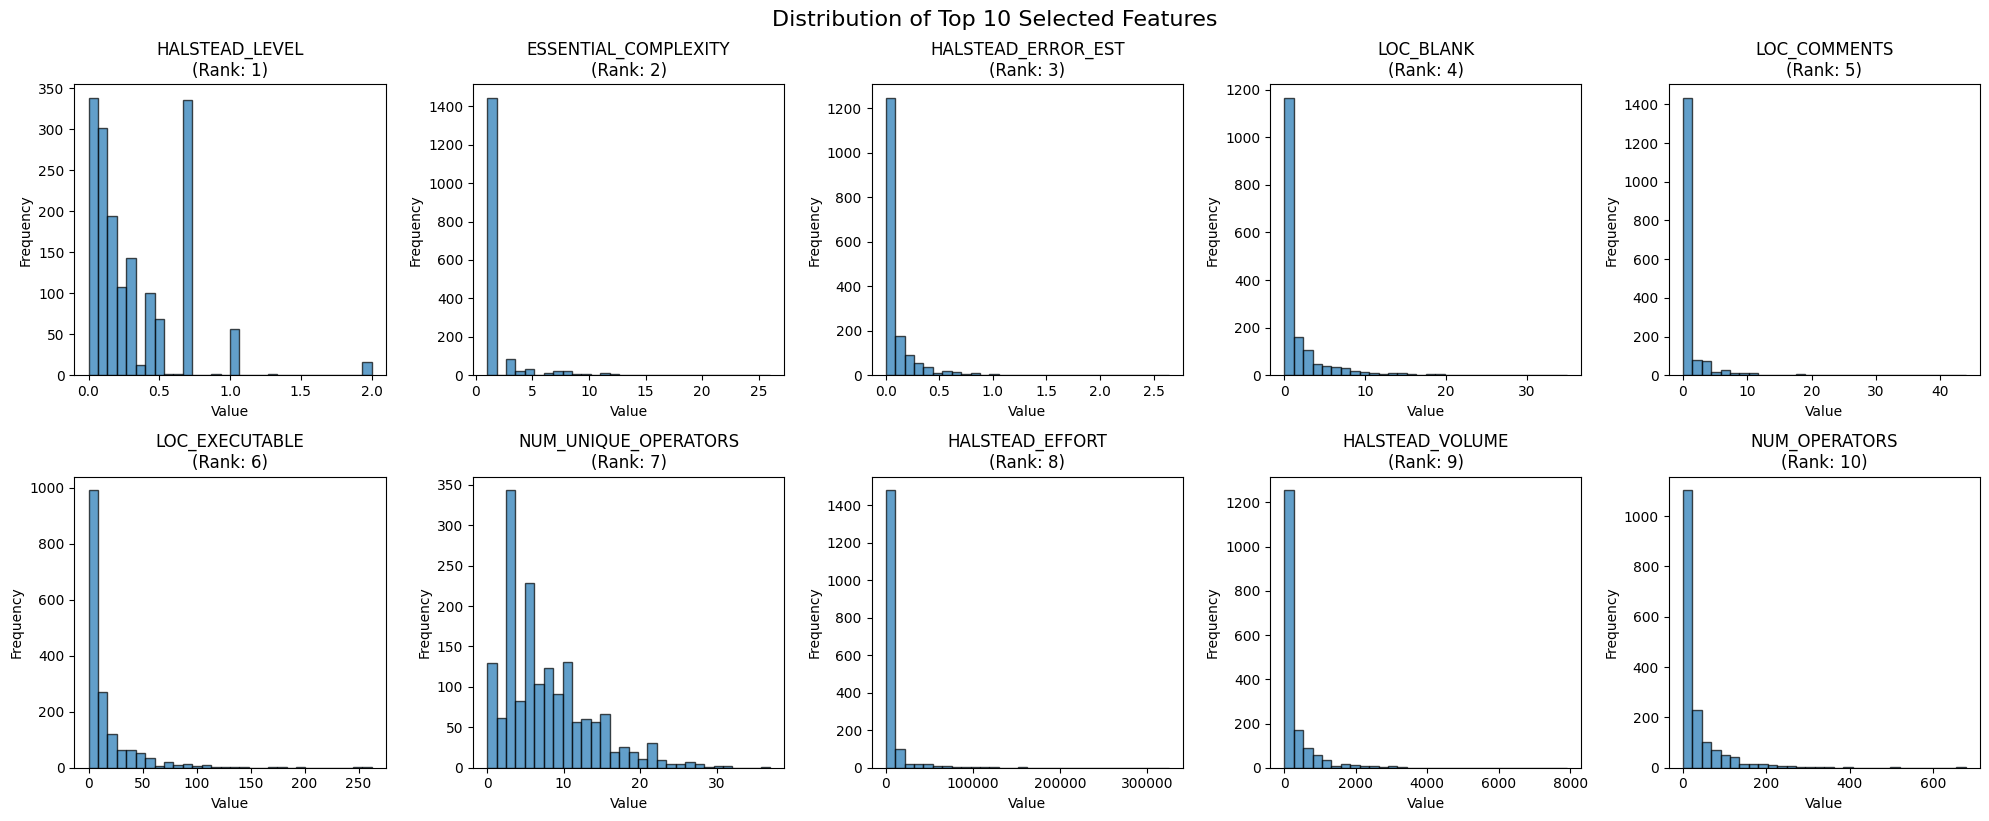

In [9]:
# Plot distribution of top features
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, feature in enumerate(top_k_features):
    axes[i].hist(data[feature], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{feature}\n(Rank: {i+1})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of Top 10 Selected Features', y=1.02, fontsize=16)
plt.show()

## Create Feature Importance Report

Generate a comprehensive report of the feature selection results.

In [10]:
# Create comprehensive feature importance report
report_data = []
for i, (_, row) in enumerate(importance_df.iterrows(), 1):
    feature = row['Feature']
    importance = row['Importance']
    selected = 'Yes' if feature in top_k_features else 'No'

    # Calculate some statistics for the feature
    feature_data = data[feature]
    mean_val = feature_data.mean()
    std_val = feature_data.std()
    min_val = feature_data.min()
    max_val = feature_data.max()

    report_data.append({
        'Rank': i,
        'Feature': feature,
        'Importance_Score': importance,
        'Selected': selected,
        'Mean': mean_val,
        'Std': std_val,
        'Min': min_val,
        'Max': max_val
    })

# Create report dataframe
feature_report = pd.DataFrame(report_data)

# Save the complete report
feature_report.to_csv('train_features_importance_report.csv', index=False)
print("Feature importance report saved to 'train_features_importance_report.csv'")

# Display top 15 features in the report
print("\nTop 15 Features Report:")
print(feature_report.head(15).round(4))

Feature importance report saved to 'train_features_importance_report.csv'

Top 15 Features Report:
    Rank               Feature  Importance_Score Selected       Mean  \
0      1        HALSTEAD_LEVEL           10.0787      Yes     0.3185   
1      2  ESSENTIAL_COMPLEXITY            9.6497      Yes     1.7011   
2      3    HALSTEAD_ERROR_EST            9.4412      Yes     0.0882   
3      4             LOC_BLANK            9.4393      Yes     1.8013   
4      5          LOC_COMMENTS            9.3855      Yes     0.9391   
5      6        LOC_EXECUTABLE            9.1689      Yes    14.9314   
6      7  NUM_UNIQUE_OPERATORS            9.1668      Yes     7.7548   
7      8       HALSTEAD_EFFORT            8.9378      Yes  5419.7259   
8      9       HALSTEAD_VOLUME            8.9294      Yes   266.3683   
9     10         NUM_OPERATORS            8.9167      Yes    31.8162   
10    11  LOC_CODE_AND_COMMENT            8.8982       No     0.1247   
11    12    HALSTEAD_PROG_TIME       

## Save Recommended Features

Save the list of recommended features to a text file for easy reference.

In [11]:
# Save recommended features to text file
with open('train_recommended_features.txt', 'w') as f:
    f.write("Top Features Selected from Train_Features.csv\n")
    f.write("=" * 50 + "\n\n")
    f.write(f"Selection Method: Autoencoder-based Feature Importance\n")
    f.write(f"Number of features selected: {k}\n")
    f.write(f"Total features available: {len(feature_columns)}\n\n")

    f.write("Selected Features (in order of importance):\n")
    f.write("-" * 40 + "\n")
    for i, feature in enumerate(top_k_features, 1):
        importance_score = importance_df[importance_df['Feature'] == feature]['Importance'].iloc[0]
        f.write(f"{i:2d}. {feature:<25} (Score: {importance_score:.4f})\n")

    f.write("\n" + "=" * 50 + "\n")
    f.write("Note: Features are ranked by their importance scores derived from\n")
    f.write("autoencoder weights. Higher scores indicate more important features.\n")

print("Recommended features saved to 'train_recommended_features.txt'")

# Display summary
print(f"\n=== FEATURE SELECTION SUMMARY ===")
print(f"Original features: {len(feature_columns)}")
print(f"Selected features: {k}")
print(f"Reduction ratio: {(1 - k/len(feature_columns))*100:.1f}%")
print(f"\nFiles created:")
print(f"1. train_features_selected.csv - Dataset with selected features")
print(f"2. train_features_importance_report.csv - Complete importance report")
print(f"3. train_recommended_features.txt - List of recommended features")

Recommended features saved to 'train_recommended_features.txt'

=== FEATURE SELECTION SUMMARY ===
Original features: 21
Selected features: 10
Reduction ratio: 52.4%

Files created:
1. train_features_selected.csv - Dataset with selected features
2. train_features_importance_report.csv - Complete importance report
3. train_recommended_features.txt - List of recommended features
